<a href="https://colab.research.google.com/github/krisna31/bike-share-by-day-analysis/blob/main/Bike_Share_by_Day_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)
- Nama: Jelvin Krisna Putra
- Email: krisnaaaputraaa@gmail.com
- Id Dicoding: krisna31

## Penjelasan Atribut

Both `hour.csv` and `day.csv` have the following fields, except `hr` which is not available in `day.csv`.

- `instant`: record index
- `dteday`: date
- `season`: season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr`: year (0: 2011, 1: 2012)
- `mnth`: month (1 to 12)
- `hr`: hour (0 to 23)
- `holiday`: weather day is a holiday or not (extracted from [Web Link])
- `weekday`: day of the week
- `workingday`: if the day is neither a weekend nor a holiday, it is 1, otherwise, it is 0.
- `weathersit`:
  1: Clear, Few clouds, Partly cloudy, Partly cloudy
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp`: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum`: Normalized humidity. The values are divided by 100 (max)
- `windspeed`: Normalized wind speed. The values are divided by 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

For further information, please refer to the [Bike Sharing Dataset](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) documentation.


## Menentukan Pertanyaan Bisnis

- pertanyaan 1: Bagaimana performa jumlah peminjaman sepeda jika dibandingkan dengan cuaca dalam 12 bulan terakhir?
- pertanyaan 2: Bagaimana performa jumlah peminjaman sepeda jika dilihat dari hari kerja dan hari libur dalam 12 bulan terakhir?
- pertanyaan 3: Bagaimana performa jumlah peminjaman sepeda dalam 12 bulan terakhir?

## Menyiapkan semua library yang dibutuhkan

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Memuat data dari file csv ke dataframe

In [81]:
day_df = pd.read_csv('data/day.csv') # Membaca file day.csv karena data yang akan dianalisis adalah data harian untuk menjawab pertanyaan-pertanyaan bisnis yang diajukan
day_df.head() # Menampilkan 5 baris pertama dari data day.csv

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

### Menilai data day.csv

In [82]:
day_df.info() # Menampilkan informasi data day.csv menggunaan method info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Cek apakah ada data yang duplikat

In [83]:
print("Data Duplikat sebanyak", day_df.duplicated().sum(), "data") # Menampilkan jumlah data duplikat

Data Duplikat sebanyak 0 data


### Cek apakah ada data yang hilang

In [84]:
day_df.isnull().sum() # Menampilkan jumlah data null

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Bisa dilihat dari output di atas bahwa data tidak ada yang hilang (missing value)

In [85]:
day_df.describe() # Menampilkan deskripsi data day.csv

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Bisa dilihat dari output di atas bahwa data tidak ada anomali (data yang tidak sesuai)

### Cleaning Data

### Mengubah tipe data kolom dteday menjadi datetime

In [86]:
day_df['dteday'] = pd.to_datetime(day_df['dteday']) # Mengubah tipe data kolom dteday menjadi datetime

In [87]:
day_df.info() # Menampilkan informasi data day.csv setelah kolom dteday diubah menjadi datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### mengubah nama kolom agar lebih mudah dimengerti

In [88]:
day_df.rename(columns={'instant':'index (id)', 'yr':'year', 'mnth':'month'}, inplace=True) # Mengubah nama kolom instant menjadi index (id), yr menjadi year, dan mnth menjadi month

## Exploratory Data Analysis (EDA)

### Explore days.csv pada variabel day_df

In [89]:
day_df.describe(include='all') # menampilkan semua kolom pada data day.csv

,index (id),dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [90]:
day_df['season'].value_counts() # Menampilkan jumlah data pada kolom season

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [136]:
day_df.aggregate({'season':['min', 'max', 'median', 'mean', 'std']}) # Menampilkan nilai minimum, maksimum, median, mean, dan standar deviasi pada kolom season

,season
min,1.000000
max,4.000000
median,3.000000
mean,2.496580
std,1.110807


In [137]:
day_df['cnt'].describe() # Menampilkan deskripsi data pada kolom cnt

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [139]:
day_df[day_df['cnt'].max() == day_df['cnt']] # Menampilkan data dengan nilai maksimum pada kolom cnt

,index (id),dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


In [140]:
day_df[day_df['cnt'].min() == day_df['cnt']] # Menampilkan data dengan nilai minimum pada kolom cnt

,index (id),dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
667,668,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,2,20,22


In [144]:
day_df['workingday'].unique() # Menampilkan nilai unik pada kolom working day

array([0, 1], dtype=int64)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa jumlah peminjaman sepeda jika dibandingkan dengan cuaca dalam 12 bulan terakhir?

In [91]:
day_df # Menampilkan data day.csv baik atas (head) maupun bawah(tail)

,index (id),dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


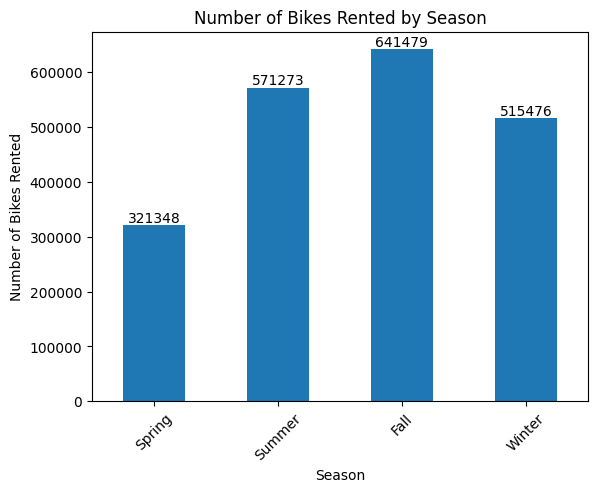

In [99]:
rent_by_holiday = day_df[day_df['dteday'] >= '2012-01-01'].groupby('season')['cnt'].sum() # Mengelompokkan data berdasarkan season dan menjumlahkan data pada kolom cnt

axis = rent_by_holiday.plot(kind='bar') # Membuat bar plot dari data season_counts

axis.set_title('Number of Bikes Rented by Season') # Memberi judul pada bar plot
axis.set_xlabel('Season') # Memberi label pada sumbu x
axis.set_ylabel('Number of Bikes Rented') # Memberi label pada sumbu y

day_in_name = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}  # Membuat dictionary season_labels
axis.set_xticklabels([day_in_name[x] for x in rent_by_holiday.index], rotation=45) # Memberi label pada sumbu x berdasarkan dictionary season_labels

for index, value in enumerate(rent_by_holiday):
    plt.text(index, value, str(value), ha='center', va='bottom') # Menampilkan nilai dari setiap bar plot

plt.show() # Menampilkan bar plot

### Pertanyaan 2: Bagaimana performa jumlah peminjaman sepeda jika dilihat dari hari kerja dan hari libur dalam 12 bulan terakhir?

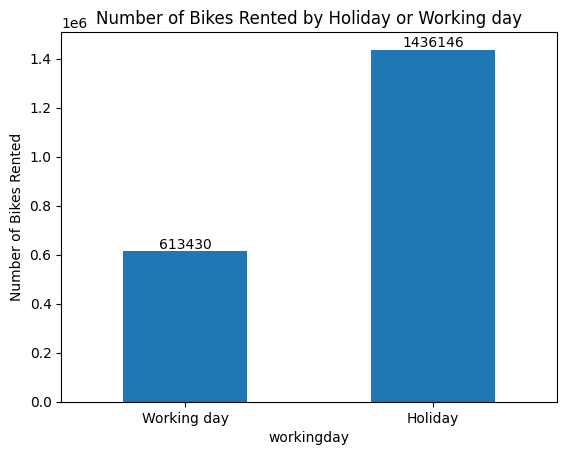

In [113]:
rent_by_holiday = day_df[day_df['dteday'] >= '2012-01-01'].groupby('workingday')['cnt'].sum() # Mengelompokkan data berdasarkan season dan menjumlahkan data pada kolom cnt

axis = rent_by_holiday.plot(kind='bar') # Membuat bar plot dari data season_counts

axis.set_title('Number of Bikes Rented by Holiday or Working day') # Memberi judul pada bar plot
# axis.set_xlabel('Holiday or Working day') # Memberi label pada sumbu x
axis.set_ylabel('Number of Bikes Rented') # Memberi label pada sumbu y

day_in_name = {0: 'Working day', 1: 'Holiday'}  # Membuat dictionary season_labels
axis.set_xticklabels([day_in_name[x] for x in rent_by_holiday.index], rotation=0) # Memberi label pada sumbu x berdasarkan dictionary season_labels

for index, value in enumerate(rent_by_holiday):
    plt.text(index, value, str(value), ha='center', va='bottom') # Menampilkan nilai dari setiap bar plot

plt.show() # Menampilkan bar plot

### Pertanyaan 3: Bagaimana performa jumlah peminjaman sepeda dalam 12 bulan terakhir?

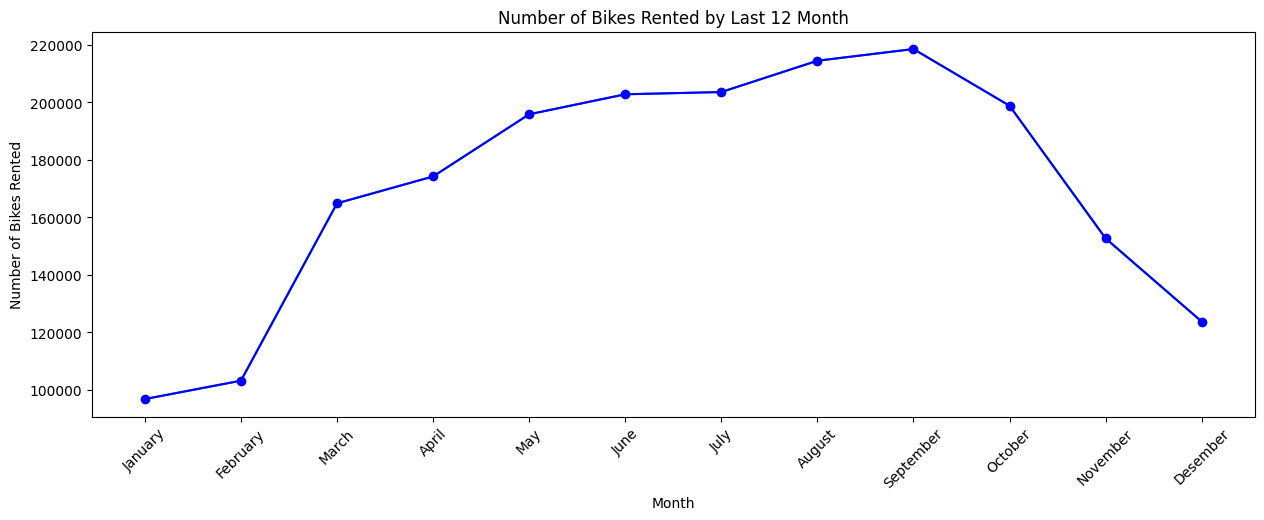

In [133]:
plt.figure(figsize=(15, 5)) # set the size of the plot

# kelompokkan jumlah penjualan dalam 12 bulan terakhir dan buat dalam bentuk line plot
rent_by_holiday = day_df[day_df['dteday'] >= '2012-01-01'].groupby('month')['cnt'].sum() # Mengelompokkan data berdasarkan season dan menjumlahkan data pada kolom cnt

axis = rent_by_holiday.plot(kind='line') # Membuat bar plot dari data season_counts

axis.set_title('Number of Bikes Rented by Last 12 Month') # Memberi judul pada bar plot
axis.set_xlabel('Month') # Memberi label pada sumbu x
axis.set_ylabel('Number of Bikes Rented') # Memberi label pada sumbu y


# show all the x ticks
plt.xticks(np.arange(1, 13, 1))

day_in_name = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'Desember'}  # Membuat dictionary season_labels
axis.set_xticklabels([day_in_name[x] for x in rent_by_holiday.index], rotation=45) # Memberi label pada sumbu x berdasarkan dictionary season_labels

# for index, value in enumerate(rent_by_holiday):
#   plt.text(index, value, str(value), ha='center', va='bottom') # Menampilkan nilai dari setiap bar plot

plt.plot(rent_by_holiday, marker='o', color='blue', linestyle='solid') # Menampilkan nilai dari setiap bar plot

plt.show() # Menampilkan bar plot

## Conclusion

- Conclusion pertanyaan 1: `Season 3 (Fall) memiliki jumlah peminjaman sepeda terbanyak dibandingkan season lainnya, sehingga stok sepeda harus ditingkatkan pada season ini. Sedangkan season 1 (Spring) memiliki jumlah peminjaman sepeda terendah dibandingkan season lainnya, sehingga stok sepeda harus dikurangi pada season ini.`
- conclusion pertanyaan 2: `Jumlah peminjaman sepeda pada hari libur lebih tinggi dibandingkan hari kerja, sehingga stok sepeda harus ditingkatkan pada hari kerja.`
- conclusion pertanyaan 3: `Quartal kedua dan ketiga merupakan quartal dengan jumlah peminjaman sepeda terbanyak, sehingga stok sepeda harus ditingkatkan pada quartal ini. Sedangkan quartal pertama (awal tahun) merupakan quartal dengan jumlah peminjaman sepeda terendah.`

@2023 by krisna31 | For Dicoding Submission